# Question (1)
High-level Problem Solving
When a customer orders from Mrsool , he can order through a menu if the store is contracted with Mrsool. 
The other option is to write his order in a free-text form. You have been tasked to create a model to classify 100K Stores into 9 Categories such as ( Restaurant, hypermarkets , coffee etc) . The task is to predict the store category, given only the orders text. The data is not labeled.

You have only one week to complete the task, how are you going to do it? We are ok with having low accuracy but we need something quick.

# Answer (1)

Okay, let make it simple

Problem stamente:-
 - We have a text, and we need to classify each text into an output of 9 categories, where the 100k inputs are not labeled. We have limited time to build our model, which ganna be an unsupervised learning problem

----

- Since we don’t have labeled Y, we can cluster each text into 9 clusters (categories). where each group (cluster) should represent one of the giving categories.


There are two ways I would consider (two solutions):
 - **Topic modeling** 
 - **embedding then clustring**

* When dealing with textual data the most import step is getting your text clean and ready to work with

<img src="1.jpg" alt="CleanText">


* Below is a simple sketch of how I would tackle the above problem 

<img src="2.jpg" alt="Modelsketch">

------------

# Question (2)


Your above solution got us good results. We got the buy-in from the top management to do it right and take our time to solve the classification with a high accuracy. Describe your approach of doing classification accurately?

we can transfer the problem into classification (supervis learning problem ) labeling some data, this time consuming proccess. but will definitely perduce a better results. (Crowdsourcing). After obtuning labele data we can throw different ML Algorithms or even deepLearining.

# Answer (2)

- We can transfer the problem into a supervised learning problem, labeling the data; this is a time-consuming process. But will definitely produce better results (Crowdsourcing).

- After obtaining labeled data, we can throw any supervised ML Algorithm; this will produce a better result for sure.

The below tweet summarized it

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Rather than spending a month figuring out an unsupervised machine learning problem, just label some data for a week and train a classifier.</p>&mdash; Richard Socher (@RichardSocher) <a href="https://twitter.com/RichardSocher/status/840333380130553856?ref_src=twsrc%5Etfw">March 10, 2017</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

-------

# Question (3)

- Imagine that you are a data scientist in real-estate company and your first task is to analyze this dataset. Provide the business insights you find most compelling in this dataset for non-technical audience.

# Answer (3)

### Simple EDA

In [201]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head(4)

,creation_datetime,updated_at,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,property_type,...,area,street_direction,street_width,for_rent_or_sale,num_water_cycles,Latitude,Longitude,region_name_en,nearest_city_name_en,district_name_en
0,2016-03-04 13:49:48,2016-06-02 07:07:34,0,1,4,0,1,مغلق,غير محدد,فيلا,...,297,شمال,15,للبيع,5,24.8402,46.7528,Riyadh,AR RIYADH,Al Munsiyah
1,2016-02-21 23:35:44,2016-02-25 12:19:14,0,0,0,0,0,مغلق,سكني,أرض,...,450,شمال,20,للبيع,0,24.6175,46.5280,Riyadh,UBAYR,Dhahrat Laban
2,2016-01-05 21:26:47,2016-03-05 18:25:43,0,0,5,0,1,مغلق,غير محدد,فيلا,...,750,شرق,20,للبيع,5,24.8131,46.5991,Riyadh,AL WUSAYL,Al Malqa
3,2016-02-04 09:29:46,2016-02-04 09:29:58,0,0,1,0,1,مغلق,غير محدد,فيلا,...,500,شمال,5,للبيع,1,24.6738,46.7369,Riyadh,AR RIYADH,Al Malaz


In [202]:
df.columns

Index(['creation_datetime', 'updated_at', 'age_less_than', 'num_apartments',
       'num_bedrooms', 'floor_num', 'num_kitchens', 'closed',
       'commercial_or_residential', 'property_type', 'driver_room', 'duplex',
       'family_or_single', 'furnished', 'num_living_rooms', 'maid_room',
       'price_per_meter', 'advertiser_type', 'pool', 'paid', 'price',
       'rent_period', 'num_rooms', 'area', 'street_direction', 'street_width',
       'for_rent_or_sale', 'num_water_cycles', 'Latitude', 'Longitude',
       'region_name_en', 'nearest_city_name_en', 'district_name_en'],
      dtype='object')

In [214]:
len(df.drop_duplicates())

79973

In [215]:
## Total number of records 
len(df)

79975

In [216]:
df.drop_duplicates(inplace=True)

In [204]:
##  let create quarter, it best for analyzing time series data
##  usually property will not change in a few weeks
##
df['quarter'] = pd.PeriodIndex(df.updated_at, freq='Q')
df['quarter']

0        2016Q2
1        2016Q1
2        2016Q1
3        2016Q1
4        2016Q2
          ...  
79970    2016Q3
79971    2016Q3
79972    2016Q4
79973    2015Q3
79974    2016Q3
Name: quarter, Length: 79975, dtype: period[Q-DEC]

In [205]:
## Fixing arabic text ploting
### شقه < ه ق ش
import arabic_reshaper
import matplotlib.pyplot as plt
from bidi.algorithm import get_display

property_type_ar = [ ]
family_or_single_ar = [ ]

for i in range (0,len(df)):
    property_type_ar.append(get_display(arabic_reshaper.reshape(df.iloc[i]['property_type'])))
    family_or_single_ar.append(get_display(arabic_reshaper.reshape(df.iloc[i]['family_or_single'])))

df['property_type_ar'] = property_type_ar
df['family_or_single_ar'] = family_or_single_ar

array([<AxesSubplot:title={'center':'property_type_ar'}>], dtype=object)

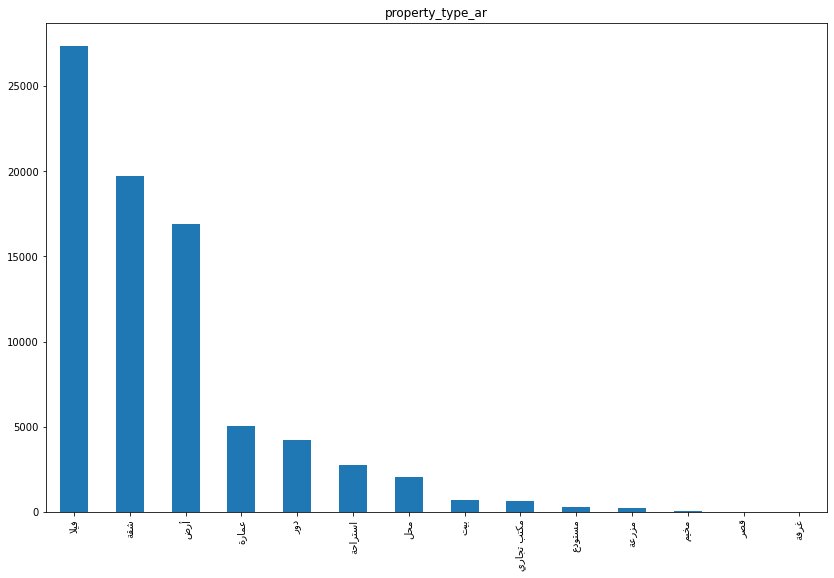

In [219]:
df['property_type_ar'].value_counts().plot.bar(figsize=(14, 9), subplots=True)

 Most of the property in our dataset are (فيلا ،شقه،ارض), okay we can focus on one of those property and try to find some **insight** 

array([<AxesSubplot:title={'center':'family_or_single_ar'}>], dtype=object)

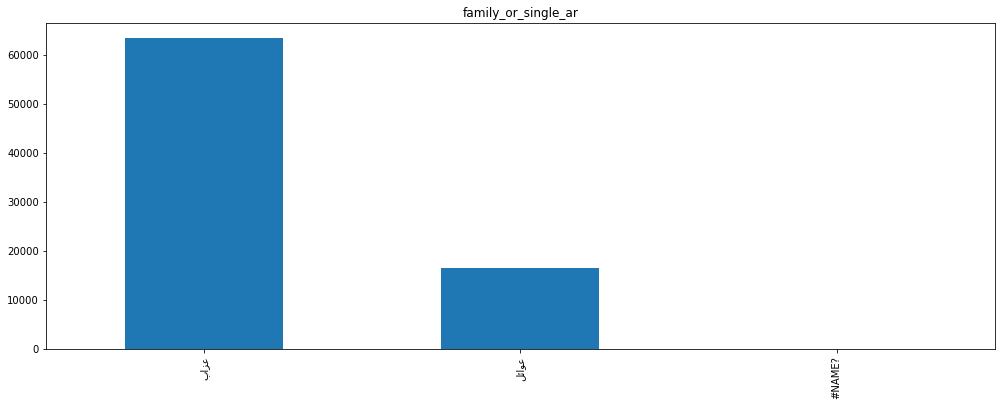

In [209]:
df['family_or_single_ar'].value_counts().plot.bar(figsize=(17, 6), subplots=True)

In [208]:
df['family_or_single'].value_counts(normalize=True) * 100

عزاب      79.267271
عوائل     20.728978
#NAME?     0.003751
Name: family_or_single, dtype: float64

- 80% of the property are for single, it possibly this data is not a representative (subset).
- Let go to excel and do some basic analysis.

<img src="4.jpg" alt="CleanText">

        - Okay, now make since ارض type are only associated with## عزاب
        - That why 80% of our data r عزاب

Most property is open for sale 

<img src="5.jpg" alt="CleanText">

most of the property that r open for sales
 - **Vela not furnished and not a (non-duplex)**

<img src="6.jpg" alt="CleanText">

--------

# Question (4)

Describe your approach if you have been asked to build an ML model to forecast the house prices . Provide your code as a Jupyter notebook

# Answer (4)

In [250]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from scipy import stats
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [251]:
train = pd.read_csv('train.csv')
train.drop_duplicates(inplace=True)

#### Since we have a lot of features in our dataset we need to perform proper feature engineering; as the more feature we have, the more data we need to train our model
                                     the curse of high dimensionality

In [252]:
train.head(2)

,creation_datetime,updated_at,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,property_type,...,area,street_direction,street_width,for_rent_or_sale,num_water_cycles,Latitude,Longitude,region_name_en,nearest_city_name_en,district_name_en
0,2016-03-04 13:49:48,2016-06-02 07:07:34,0,1,4,0,1,مغلق,غير محدد,فيلا,...,297,شمال,15,للبيع,5,24.8402,46.7528,Riyadh,AR RIYADH,Al Munsiyah
1,2016-02-21 23:35:44,2016-02-25 12:19:14,0,0,0,0,0,مغلق,سكني,أرض,...,450,شمال,20,للبيع,0,24.6175,46.5280,Riyadh,UBAYR,Dhahrat Laban


In [253]:
## How many featuers we have
print("Number of col in training (feature) : {} ".format(train.shape[1] - 1))

Number of col in training (feature) : 32 


In [254]:
### traning set
len(train)

79973

# Data Processing

This is a challenging data set; why? There is a-lot of features that affect some type property not the other; also, it continues a different type of property listing apartment rent for a (day or week or month or year) and for sells!. 
- This feature will be the import features that determent the price of a property of an apartment.

- Also, we have houses for rent or sale. also num_floor only vaild in apparment and not in house or land listing.

For example, going for ارض, most of our features will not affect the property price and would be useless (e.g., num_kitchens, floor_num,num_bedrooms,driver_room) and much more; **where is the problem in this?** Okay, to make it short, if I included ارض there would be a lot of useless features that I would train my model on; this will affect the model's greatly. how would I go with this, then? for a better result, we need to have more than one model, one for املاك and the other for ارض For now, I will drop ارض from my model; I believe this is more than justified.

We can build a different model for ارض

In [255]:
train.drop(train[train['property_type'] == 'أرض'].index, inplace=True)

In [256]:
# Null?
train.isnull().sum()

creation_datetime              0
updated_at                     0
age_less_than                  0
num_apartments                 0
num_bedrooms                   0
floor_num                      0
num_kitchens                   0
closed                         0
commercial_or_residential      0
property_type                  0
driver_room                    0
duplex                         0
family_or_single               0
furnished                      0
num_living_rooms               0
maid_room                      0
price_per_meter                0
advertiser_type                0
pool                           0
paid                           0
price                          0
rent_period                    0
num_rooms                      0
area                           0
street_direction               0
street_width                   0
for_rent_or_sale               0
num_water_cycles               0
Latitude                       0
Longitude                      0
region_nam

- **district_name_en** => is an imporntant featuer that will difficulty effect the propriety price. so I would drop the 638 null
     - **Note** that this is fixable, I faced this issue before; since I have the property coordination, I can get the district_name from **google map API**

In [257]:
train.dropna(inplace=True)

dropping unnecessary feature
 - Latitude & Longitude:- since, we have the district name, the coordination is not needed.
 - nearest_city_name_en:- this is useless we already have the all the listing are in Riyadh.
 - price_per_meter :- this feature for land only.
 - region_name_en:- all Riyadh
 - creation_datetime:- I will consider the updated date since it makes more since there was an update on the data at that time. Maybe it was the price.
 

In [258]:
train.drop(['Latitude','Longitude','nearest_city_name_en','price_per_meter','region_name_en','creation_datetime'],axis=True,inplace=True)

One of the most popular ways of dealing with dates is to split the data into a numerical representation. also, I will discard the day I will only consider year and month

In [259]:
train['year'] = pd.to_numeric(train['updated_at'].apply(lambda x: x.split('-')[0]))
train['month'] = pd.to_numeric(train['updated_at'].apply(lambda x: x.split('-')[1]))
train.drop(['updated_at'],axis=True,inplace=True)
train.head()

,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,property_type,driver_room,duplex,...,rent_period,num_rooms,area,street_direction,street_width,for_rent_or_sale,num_water_cycles,district_name_en,year,month
0,0,1,4,0,1,مغلق,غير محدد,فيلا,غرفة سائق,ليست دوبلكس,...,غير محدد,0,297,شمال,15,للبيع,5,Al Munsiyah,2016,6
2,0,0,5,0,1,مغلق,غير محدد,فيلا,غرفة سائق,ليست دوبلكس,...,غير محدد,0,750,شرق,20,للبيع,5,Al Malqa,2016,3
3,0,0,1,0,1,مغلق,غير محدد,فيلا,لا يوجد غرفة سائق,ليست دوبلكس,...,غير محدد,0,500,شمال,5,للبيع,1,Al Malaz,2016,2
4,4,0,3,2,1,مغلق,غير محدد,شقة,لا يوجد غرفة سائق,ليست دوبلكس,...,سنوي,0,0,شمال غربي,35,للإيجار,3,Al Yasmin,2016,5
5,0,0,2,0,1,مغلق,غير محدد,استراحة,لا يوجد غرفة سائق,ليست دوبلكس,...,يومي,0,1000,غير محدد,0,للإيجار,2,Ar Rimal,2016,8


Scaling numerical variables:- this step did not affent the model score ==> skiped

In [260]:
#Scaling Numarical Values
#from sklearn.preprocessing import MinMaxScaler
#
# Initialize a scaler, then apply it to the features
#scaler = MinMaxScaler() # default=(0, 1)
#numerical = [ 'area']

#train = pd.DataFrame(data = train)
#train[numerical] = scaler.fit_transform(train[numerical])

Transforming categorical data into a numerical representation

In [261]:
#Here we encoding the categorical data

from sklearn.preprocessing import LabelEncoder
cols = ('commercial_or_residential', 'driver_room','closed','commercial_or_residential','property_type','duplex',
       'family_or_single','furnished','num_living_rooms','maid_room','advertiser_type','pool','paid','rent_period',
       'street_direction','for_rent_or_sale','district_name_en')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

train.head()

,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,property_type,driver_room,duplex,...,rent_period,num_rooms,area,street_direction,street_width,for_rent_or_sale,num_water_cycles,district_name_en,year,month
0,0,1,4,0,1,2,4,6,0,1,...,5,0,297,6,15,1,5,57,2016,6
2,0,0,5,0,1,2,4,6,0,1,...,5,0,750,5,20,1,5,44,2016,3
3,0,0,1,0,1,2,4,6,1,1,...,5,0,500,6,5,1,1,43,2016,2
4,4,0,3,2,1,2,4,3,1,1,...,3,0,0,8,35,0,3,80,2016,5
5,0,0,2,0,1,2,4,0,1,1,...,6,0,1000,10,0,0,2,101,2016,8


#### inspecting the correlation between different variables 

Text(0.5, 1.0, 'Correlation between different fearures')

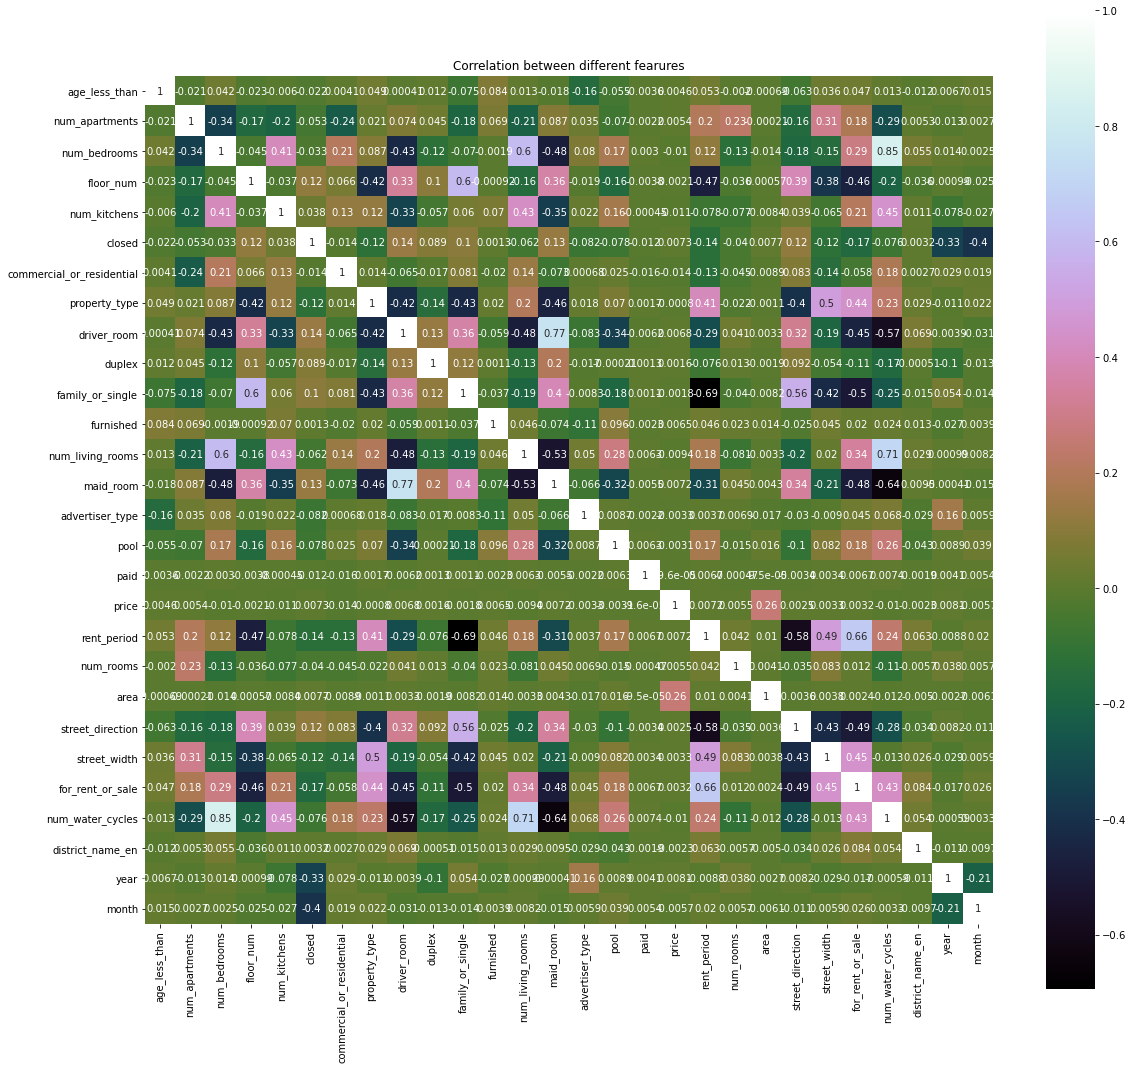

In [262]:
correlation = train.corr()
plt.figure(figsize=(19,18))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

            - 0.85 the corrlation between the number of bedrom and the number water cycles 
            - 0.77 corrlation driver room and maid room 0.71 number water cycles and number of livening room

### PCA


###### Dimensionality reduction would be logical in our case, as the number of num_kitchens increases, the number of  num_bedrooms & num_living_rooms increase also, those similar features can be combined into one feature that represents as one.

In [268]:
## 
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler(with_std  = True ,with_mean = True, copy = True)
#X_train_std = sc.fit_transform(X_train)
#X_test_std = sc.transform(X_test)
#
#------\
#
#from sklearn.decomposition import PCA,KernelPCA
#pca = PCA(n_components=2,svd_solver='full')
#X_train_pca = pca.fit_transform(X_train_std)
#X_test_pca = pca.transform(X_test_std)
#pca.explained_variance_ratio_

#------\
#from sklearn.svm import SVR

#model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)
#model.fit(X_train, y_train)

                - I was planning to build Support vector regression for multivariate, it has been a busy week!!. I need something fast and efficient

**RandomForestRegressor**

In [264]:
train.head(2)

,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,property_type,driver_room,duplex,...,rent_period,num_rooms,area,street_direction,street_width,for_rent_or_sale,num_water_cycles,district_name_en,year,month
0,0,1,4,0,1,2,4,6,0,1,...,5,0,297,6,15,1,5,57,2016,6
2,0,0,5,0,1,2,4,6,0,1,...,5,0,750,5,20,1,5,44,2016,3


In [265]:
y_train = train.price.values
#train["price"] = np.log1p(train["price"]) ==> no need 

In [266]:
X_train, X_test, y_train, y_test = train_test_split(train.values, y_train, test_size = 0.2,random_state=42) 
print("The split of the under_sampled data is as follows")
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

The split of the under_sampled data is as follows
X_train:  49970
X_test:  12493
y_train:  49970
y_test:  12493


                                - hyperparameter tuning grid search

In [267]:
## Define Grid 
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}
## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

                                        let's build our model

In [269]:
CV_rfr.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 18}

In [272]:
model = RandomForestRegressor(n_estimators=200, max_depth=7,max_features='sqrt')#cls = RandomForestRegressor(n_estimators=150)

model.fit(X_train, y_train)
scoreOfModel = model.score(X_train, y_train)


print("Score is calculated as: ",round(scoreOfModel,2))

Score is calculated as:  0.91


    This is good enough; if I have more time, I believe I could emphasize more on the data processes and features  selection 

                        Also LSTM & bidirectional ==> could work great here !!


                            
 <a href="https://www.kaggle.com/alialhumaid"> MY KAGGLE</a>

--------

# Question (5)



Python Test
Write a python function that takes a string date input (Ex: ‘2020-02-20’) and returns the day of the week for that date without using any date related libraries.

Instructions:
The input should be structured as follows: y-m-d
Take into your consideration leap years https://en.wikipedia.org/wiki/Leap_year
The output should be the name of the day

Examples:
- getDayOfTheWeek(‘2020-02-20’) → Thursday
- getDayOfTheWeek(‘2021-01-01’) → Friday 
- getDayOfTheWeek(‘1992-11-16’) → Monday


# Answer (5)

In [7]:
# Knowing that Monday, January 1, 1900
dayOfTheWeek = {
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
}
 
 
def getDayOfTheWeek(date: str) -> str:
    ## spliting input ##
    _date = date.split("-")
    _year = int(_date[0])
    _month = int(_date[1])
    _day = int(_date[2])
 
    # Validate date year e.g. 2022
    assert len(_date[0]) == 4
 
    _days = getDays(_year, _month, _day)
    _modDayOfTheWeek = _days % len(dayOfTheWeek)
    return "{} -> {}".format(date, dayOfTheWeek[_modDayOfTheWeek])
 
 
def getDays(year: int, month: int, day: int) -> int:
    ## calclating days ##
    assert year >= 1900
    assert month <= 12
    assert day <= 31
 
    _days = 0
 
    for _y in range(1900, year, 1):
        if isLeap(_y):
            _days += 366
        else:
            _days += 365
 
    for _m in range(1, month, 1):
        if _m == 1:
            _days += 31
        elif _m == 2:
            _days += 29 if isLeap(year) else 28
        elif _m == 3:
            _days += 31
        elif _m == 4:
            _days += 30
        elif _m == 5:
            _days += 31
        elif _m == 6:
            _days += 30
        elif _m == 7:
            _days += 31
        elif _m == 8:
            _days += 31
        elif _m == 9:
            _days += 30
        elif _m == 10:
            _days += 31
        elif _m == 11:
            _days += 30
        else:
            _days += 31
 
    _days += day
 
    return _days
 
 
def isLeap(year: int) -> bool:
    ## find a leap year ##
    if year % 400 == 0:
        return True
    elif year % 100 == 0:
        return False
    elif year % 4 == 0:
        return True
    else:
        return False
 
 
print(getDayOfTheWeek("1995-09-14"))
 

1995-09-14 -> Thursday


In [10]:
print(getDayOfTheWeek('2020-02-20'))
print(getDayOfTheWeek('2021-01-01'))
print(getDayOfTheWeek('1992-11-16'))

2020-02-20 -> Thursday
2021-01-01 -> Friday
1992-11-16 -> Monday


------

# Question (6)

<img src="3.jpg" alt="CleanText">


# Answer (6)


- When the features of the standard least square are correlated and has linear dependence, it gets significantly affected by outliers due to the dependence and correlation.
- the second model is more general, which is better 👍